In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense, BatchNormalization, MaxPooling2D, Dropout, Conv2D, Flatten
from keras.callbacks import Callback, CSVLogger, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = 'drive/MyDrive/data/Emotions Dataset/Emotions Dataset/train'
test_path = 'drive/MyDrive/data/Emotions Dataset/Emotions Dataset/test'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_path,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(test_path,
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

Found 6809 images belonging to 3 classes.
Found 2278 images belonging to 3 classes.


## Visualize data

In [ ]:
import os

class_names = os.listdir(train_path)
class_dict = {i: name for i, name in enumerate(class_names)}

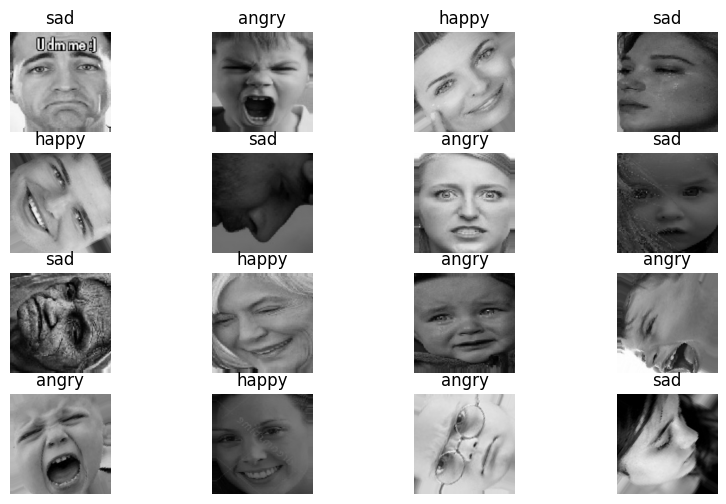

In [ ]:
batches = np.random.choice(range(100), 16, replace = False)
plt.figure(figsize = (10, 6))

for id, batch in enumerate(batches):
  class_id = np.argmax(train_data[batch][1][0])
  class_name = class_dict[class_id]
  plt.subplot(4, 4, id + 1)
  plt.title(class_name)
  plt.imshow(train_data[batch][0][0])
  plt.axis('off')

## Data Augmentation

In [ ]:
from keras.layers import RandomRotation, RandomFlip, RandomContrast

augment_layers = keras.Sequential([
    RandomRotation(factor = (-0.1, 0.1)),
    RandomFlip(mode = 'horizontal'),
    RandomContrast(factor = 0.1)
])

def augment_layer(image, label):
  return augment_layers(image, training = True), label

## Tranfer Learning model

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

vggnet = VGG16(input_shape = (224, 224, 3), weights = 'imagenet', include_top = False)
for layer in vggnet.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vggnet.output)
output = Dense(units = 3, activation = 'softmax')(x)

model = Model(inputs = vggnet.input, outputs = output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

## callback


In [ ]:
csv_loss = CSVLogger(filename = 'loss.csv',
                     separator = ',',
                     append = True)

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

## Training

In [ ]:
model.fit(train_data, batch_size = 32, epochs = 10, verbose = 1, validation_data = test_data)

Epoch 1/10
213/213 [==============================] - 4872s 23s/step - loss: 0.7470 - accuracy: 0.6770 - val_loss: 0.6567 - val_accuracy: 0.7129
Epoch 2/10
213/213 [==============================] - 4815s 23s/step - loss: 0.5736 - accuracy: 0.7660 - val_loss: 0.5587 - val_accuracy: 0.7836
Epoch 3/10
213/213 [==============================] - 4828s 23s/step - loss: 0.4903 - accuracy: 0.8009 - val_loss: 0.5201 - val_accuracy: 0.7823
Epoch 4/10
213/213 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.8035 